In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns #for background style for plots
from matplotlib.pyplot import figure #plot size
import matplotlib.style #Setting the theme of your plots

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows',100)

# Data Collection

In [2]:
data=pd.read_csv("TRAIN.csv")
print(data.shape)
data.head()

(1401, 16)


,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
0,ADF0039,123.0,4.10,76.7140,0.00,1.25,1.4951,14.0,564.0,6408.0,2.0,2G,2G,Uxaa,Mango,0.0
1,ADF0041,1316.0,43.87,98.8904,4.14,1.25,1.0244,27.0,1626.0,4373.0,1.0,2G,2G,Uxaa,Mango,0.0
2,ADF0051,2385.0,79.50,372.6300,3.51,1.25,6.0898,119.0,10411.0,22039.0,1.0,2G,2G,Weematel,Mango,0.0
3,ADF0059,1614.0,53.80,530.2000,6.85,1.25,3.3447,69.0,6822.0,6274.0,1.0,2G,2G,0,Mango,0.0
4,ADF0060,2175.0,72.50,554.1300,6.99,153.75,673204.0342,33.0,3387.0,7241.0,1.0,2G,3G,Weematel,Mango,0.0


# EDA & Preprocessing

In [3]:
data.columns=data.columns.str.replace(' ', '')

In [4]:
#Missing Values identifying

data.isnull().sum()

CustomerID                                1
network_age                               1
Customertenureinmonth                     1
TotalSpendinMonths1and2of2017             1
TotalSMSSpend                             1
TotalDataSpend                            1
TotalDataConsumption                      1
TotalUniqueCalls                          1
TotalOnnetspend                           1
TotalOffnetspend                          1
TotalCallcentrecomplaintcalls             1
NetworktypesubscriptioninMonth1         176
NetworktypesubscriptioninMonth2         145
MostLovedCompetitornetworkininMonth1      2
MostLovedCompetitornetworkininMonth2      2
ChurnStatus                               1
dtype: int64

Replace null values in these columns with 'Other'

In [5]:
data['NetworktypesubscriptioninMonth2'].fillna('Other', inplace = True)
data['NetworktypesubscriptioninMonth1'].fillna('Other', inplace = True)
data.isnull().sum()

CustomerID                              1
network_age                             1
Customertenureinmonth                   1
TotalSpendinMonths1and2of2017           1
TotalSMSSpend                           1
TotalDataSpend                          1
TotalDataConsumption                    1
TotalUniqueCalls                        1
TotalOnnetspend                         1
TotalOffnetspend                        1
TotalCallcentrecomplaintcalls           1
NetworktypesubscriptioninMonth1         0
NetworktypesubscriptioninMonth2         0
MostLovedCompetitornetworkininMonth1    2
MostLovedCompetitornetworkininMonth2    2
ChurnStatus                             1
dtype: int64

Remove remaining null values


In [6]:
data=data.dropna()
data.isnull().sum()

CustomerID                              0
network_age                             0
Customertenureinmonth                   0
TotalSpendinMonths1and2of2017           0
TotalSMSSpend                           0
TotalDataSpend                          0
TotalDataConsumption                    0
TotalUniqueCalls                        0
TotalOnnetspend                         0
TotalOffnetspend                        0
TotalCallcentrecomplaintcalls           0
NetworktypesubscriptioninMonth1         0
NetworktypesubscriptioninMonth2         0
MostLovedCompetitornetworkininMonth1    0
MostLovedCompetitornetworkininMonth2    0
ChurnStatus                             0
dtype: int64

In [7]:
#Categorical Column

cat_cols=data.select_dtypes(exclude=['int64', 'float']).columns[1:]
cat_cols

Index(['NetworktypesubscriptioninMonth1', 'NetworktypesubscriptioninMonth2',
       'MostLovedCompetitornetworkininMonth1',
       'MostLovedCompetitornetworkininMonth2'],
      dtype='object')

In [8]:
#Create categorical target variable for chi test
data['Target']=data['ChurnStatus'].apply(lambda x: 'No' if x==0.0 else 'Yes')
data.head()

,CustomerID,network_age,Customertenureinmonth,TotalSpendinMonths1and2of2017,TotalSMSSpend,TotalDataSpend,TotalDataConsumption,TotalUniqueCalls,TotalOnnetspend,TotalOffnetspend,TotalCallcentrecomplaintcalls,NetworktypesubscriptioninMonth1,NetworktypesubscriptioninMonth2,MostLovedCompetitornetworkininMonth1,MostLovedCompetitornetworkininMonth2,ChurnStatus,Target
0,ADF0039,123.0,4.10,76.7140,0.00,1.25,1.4951,14.0,564.0,6408.0,2.0,2G,2G,Uxaa,Mango,0.0,No
1,ADF0041,1316.0,43.87,98.8904,4.14,1.25,1.0244,27.0,1626.0,4373.0,1.0,2G,2G,Uxaa,Mango,0.0,No
2,ADF0051,2385.0,79.50,372.6300,3.51,1.25,6.0898,119.0,10411.0,22039.0,1.0,2G,2G,Weematel,Mango,0.0,No
3,ADF0059,1614.0,53.80,530.2000,6.85,1.25,3.3447,69.0,6822.0,6274.0,1.0,2G,2G,0,Mango,0.0,No
4,ADF0060,2175.0,72.50,554.1300,6.99,153.75,673204.0342,33.0,3387.0,7241.0,1.0,2G,3G,Weematel,Mango,0.0,No


In [10]:
cat_cols

Index(['NetworktypesubscriptioninMonth1', 'NetworktypesubscriptioninMonth2',
       'MostLovedCompetitornetworkininMonth1',
       'MostLovedCompetitornetworkininMonth2'],
      dtype='object')

In [11]:
import scipy.stats
rec=[]
for col2 in cat_cols:
        df=pd.crosstab(data['Target'],data[col2])
        chi= scipy.stats.chi2_contingency(df)
        if chi[1]<=0.05:
            print(col2 ,"  = " , chi[1])
            

NetworktypesubscriptioninMonth2   =  0.02950498883325753
MostLovedCompetitornetworkininMonth1   =  2.842469365863027e-05
MostLovedCompetitornetworkininMonth2   =  9.688720785896563e-29


Target variable is dependent on these three categorical variables

In [12]:
data1=data.drop(['Target','NetworktypesubscriptioninMonth1','CustomerID'] ,axis=1)

In [13]:
#One Hot Encoding

from sklearn.preprocessing import OneHotEncoder

data2 = pd.get_dummies(data1,drop_first ='True')

In [14]:
data2.head()

,network_age,Customertenureinmonth,TotalSpendinMonths1and2of2017,TotalSMSSpend,TotalDataSpend,TotalDataConsumption,TotalUniqueCalls,TotalOnnetspend,TotalOffnetspend,TotalCallcentrecomplaintcalls,ChurnStatus,NetworktypesubscriptioninMonth2_3G,NetworktypesubscriptioninMonth2_Other,MostLovedCompetitornetworkininMonth1_Mango,MostLovedCompetitornetworkininMonth1_PQza,MostLovedCompetitornetworkininMonth1_ToCall,MostLovedCompetitornetworkininMonth1_Uxaa,MostLovedCompetitornetworkininMonth1_Weematel,MostLovedCompetitornetworkininMonth1_Zintel,MostLovedCompetitornetworkininMonth2_PQza,MostLovedCompetitornetworkininMonth2_ToCall,MostLovedCompetitornetworkininMonth2_Uxaa,MostLovedCompetitornetworkininMonth2_Weematel,MostLovedCompetitornetworkininMonth2_Zintel
0,123.0,4.10,76.7140,0.00,1.25,1.4951,14.0,564.0,6408.0,2.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1316.0,43.87,98.8904,4.14,1.25,1.0244,27.0,1626.0,4373.0,1.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2385.0,79.50,372.6300,3.51,1.25,6.0898,119.0,10411.0,22039.0,1.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1614.0,53.80,530.2000,6.85,1.25,3.3447,69.0,6822.0,6274.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2175.0,72.50,554.1300,6.99,153.75,673204.0342,33.0,3387.0,7241.0,1.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [15]:
cr = data2.corr()
cr.ChurnStatus

network_age                                     -0.123818
Customertenureinmonth                           -0.123816
TotalSpendinMonths1and2of2017                   -0.029808
TotalSMSSpend                                    0.098836
TotalDataSpend                                   0.036607
TotalDataConsumption                            -0.142352
TotalUniqueCalls                                -0.134596
TotalOnnetspend                                 -0.005082
TotalOffnetspend                                 0.103197
TotalCallcentrecomplaintcalls                   -0.071902
ChurnStatus                                      1.000000
NetworktypesubscriptioninMonth2_3G              -0.067904
NetworktypesubscriptioninMonth2_Other            0.059982
MostLovedCompetitornetworkininMonth1_Mango       0.036161
MostLovedCompetitornetworkininMonth1_PQza        0.119585
MostLovedCompetitornetworkininMonth1_ToCall     -0.028765
MostLovedCompetitornetworkininMonth1_Uxaa       -0.030892
MostLovedCompe

In [24]:
#Data Partition

X = data2.drop('ChurnStatus', axis =1)
y = data2['ChurnStatus']

In [96]:
#Data SPlitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [97]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
X_train_scale =mm.fit_transform(X_train)
X_test_scale =mm.transform(X_test)

In [98]:
X_train_scale.shape ,X_test_scale.shape

((1119, 23), (280, 23))

# Model Training


The first thing we have to do is to set up the architecture. Let’s first think about what kind of neural network architecture we want. Suppose we want this neural network:

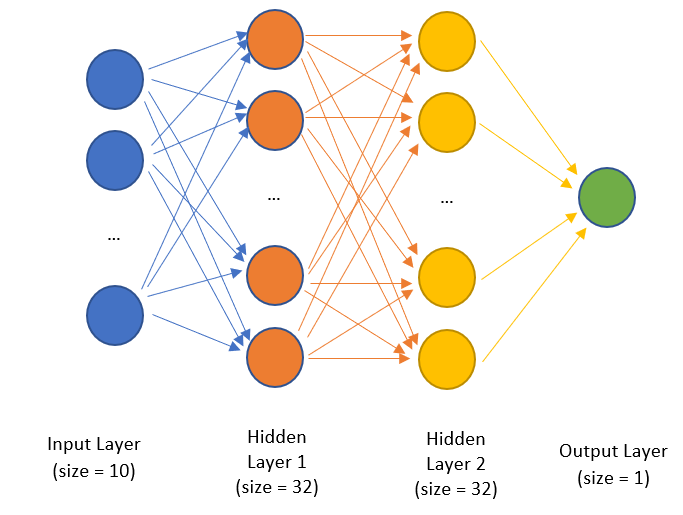

In words, we want to have these layers:

Hidden layer 1: 32 neurons, ReLU activation
Hidden layer 2: 32 neurons, ReLU activation
Output Layer: 1 neuron, Sigmoid activation

Now, we need to describe this architecture to Keras. We will be using the Sequential model, which means that we merely need to describe the layers above in sequence.

First, let’s import the necessary code from Keras:

And just like that, the code snippet above has defined our architecture! The code above can be interpreted like this:

model = Sequential([ ... ])


This says that we will store our model in the variable ‘model’, and we’ll describe it sequentially (layer by layer) in between the square brackets.


Dense(32, activation='relu', input_shape=(23,)),


We have our first layer as a dense layer with 32 neurons, ReLU activation and the input shape is 23 since we have 23 input features. Note that ‘Dense’ refers to a fully-connected layer, which is what we will be using.


Dense(32, activation='relu'),


Our second layer is also a dense layer with 32 neurons, ReLU activation. Note that we do not have to describe the input shape since Keras can infer from the output of our first layer.


Dense(1, activation='sigmoid'),


Our third layer is a dense layer with 1 neuron, sigmoid activation.


And just like that, we have written our model architecture (template) in code!


Second Step: Filling in the best numbers


Now that we’ve got our architecture specified, we need to find the best numbers for it. Before we start our training, we have to configure the model by


Telling it which algorithm you want to use to do the optimization

Telling it what loss function to use

Telling it what other metrics you want to track apart from the loss function

Configuring the model with these settings requires us to call the function model.compile, like this:

In [170]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(23, activation='relu', input_shape=(23,)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid'),
])




model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train_scale, y_train,
          batch_size=32, epochs=100,
          validation_data=(X_test_scale, y_test))

Train on 1119 samples, validate on 280 samples
Epoch 1/100
1119/1119 [==============================] - 1s - loss: 0.6830 - acc: 0.5398 - val_loss: 0.6884 - val_acc: 0.5000
Epoch 2/100
1119/1119 [==============================] - 0s - loss: 0.6736 - acc: 0.5800 - val_loss: 0.6836 - val_acc: 0.5429
Epoch 3/100
1119/1119 [==============================] - 0s - loss: 0.6665 - acc: 0.6104 - val_loss: 0.6755 - val_acc: 0.6286
Epoch 4/100
1119/1119 [==============================] - 0s - loss: 0.6560 - acc: 0.6416 - val_loss: 0.6645 - val_acc: 0.6393
Epoch 5/100
1119/1119 [==============================] - 0s - loss: 0.6445 - acc: 0.6622 - val_loss: 0.6551 - val_acc: 0.6429
Epoch 6/100
1119/1119 [==============================] - 0s - loss: 0.6352 - acc: 0.6676 - val_loss: 0.6483 - val_acc: 0.6321
Epoch 7/100
1119/1119 [==============================] - 0s - loss: 0.6292 - acc: 0.6676 - val_loss: 0.6446 - val_acc: 0.6321
Epoch 8/100
1119/1119 [==============================] - 0s - loss: 0.6

1119/1119 [==============================] - 0s - loss: 0.5421 - acc: 0.7248 - val_loss: 0.6077 - val_acc: 0.6786
Epoch 65/100
1119/1119 [==============================] - 0s - loss: 0.5470 - acc: 0.7230 - val_loss: 0.6218 - val_acc: 0.6821
Epoch 66/100
1119/1119 [==============================] - 0s - loss: 0.5402 - acc: 0.7239 - val_loss: 0.6039 - val_acc: 0.6821
Epoch 67/100
1119/1119 [==============================] - 0s - loss: 0.5375 - acc: 0.7230 - val_loss: 0.6068 - val_acc: 0.6786
Epoch 68/100
1119/1119 [==============================] - 0s - loss: 0.5366 - acc: 0.7203 - val_loss: 0.6066 - val_acc: 0.6821
Epoch 69/100
1119/1119 [==============================] - 0s - loss: 0.5384 - acc: 0.7212 - val_loss: 0.6109 - val_acc: 0.6929
Epoch 70/100
1119/1119 [==============================] - 0s - loss: 0.5351 - acc: 0.7310 - val_loss: 0.6040 - val_acc: 0.6821
Epoch 71/100
1119/1119 [==============================] - 0s - loss: 0.5342 - acc: 0.7274 - val_loss: 0.6031 - val_acc: 0.67

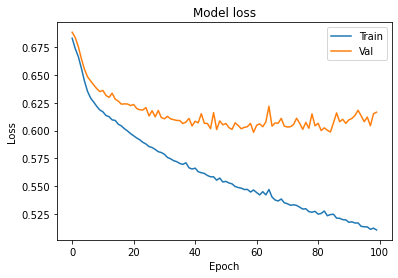

In [172]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

There is large variation for train data loss and validation data loss.So lets try by   decreasing learning rate

Train on 1119 samples, validate on 280 samples
Epoch 1/50
1119/1119 [==============================] - 1s - loss: 0.6927 - acc: 0.5228 - val_loss: 0.6933 - val_acc: 0.5071
Epoch 2/50
1119/1119 [==============================] - 0s - loss: 0.6913 - acc: 0.5255 - val_loss: 0.6921 - val_acc: 0.5000
Epoch 3/50
1119/1119 [==============================] - 0s - loss: 0.6899 - acc: 0.5237 - val_loss: 0.6909 - val_acc: 0.4893
Epoch 4/50
1119/1119 [==============================] - 0s - loss: 0.6886 - acc: 0.5255 - val_loss: 0.6898 - val_acc: 0.4929
Epoch 5/50
1119/1119 [==============================] - 0s - loss: 0.6874 - acc: 0.5344 - val_loss: 0.6887 - val_acc: 0.5036
Epoch 6/50
1119/1119 [==============================] - 0s - loss: 0.6862 - acc: 0.5424 - val_loss: 0.6878 - val_acc: 0.5071
Epoch 7/50
1119/1119 [==============================] - 0s - loss: 0.6851 - acc: 0.5451 - val_loss: 0.6868 - val_acc: 0.5250
Epoch 8/50
1119/1119 [==============================] - 0s - loss: 0.6840 - ac

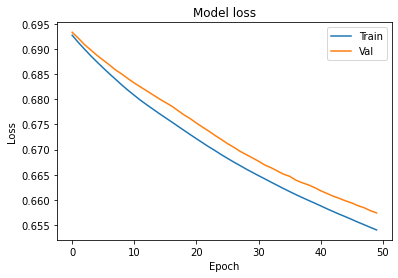

In [173]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import adam, SGD
ad = adam(lr=0.0001)

model3 = Sequential([
    Dense(10, activation='relu', input_shape=(23,)),
    #Dense(10, activation='relu'),
    Dense(1, activation='sigmoid'),
])




model3.compile(optimizer=ad,
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist3 = model3.fit(X_train_scale, y_train,
          batch_size=20, epochs=50,
          validation_data=(X_test_scale, y_test))

plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

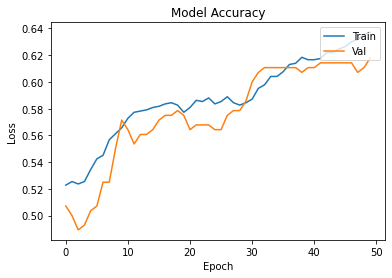

In [175]:
plt.plot(hist3.history['acc'])
plt.plot(hist3.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Hyper parameter tuning


In [179]:
from keras import regularizers      #for l2 regularization
from keras.wrappers.scikit_learn import KerasRegressor 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

In [178]:
n_cols = X_train.shape[1]
input_shape = (n_cols, )
# Creates a model given an activation and learning rate
def create_model(learning_rate = 0.01, activation = 'relu'):
  
    # Create an Adam optimizer with the given learning rate
    opt = adam(lr=learning_rate)
  
    # Create your binary classification model  
    model = Sequential()
    model.add(Dense(128, 
                    activation = activation,
                    input_shape = input_shape,
                    activity_regularizer = regularizers.l2(1e-5)))
    model.add(Dropout(0.50))
    model.add(Dense(128,
                    activation = activation, 
                    activity_regularizer = regularizers.l2(1e-5)))
    model.add(Dropout(0.50))
    model.add(Dense(1, activation = 'sigmoid'))
    # Compile the model
    model.compile(optimizer=ad,
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

The first step is to create a model object using KerasRegressor from keras.wrappers.scikit_learn by passing the create_model function. We set verbose = 0 to stop showing the model training logs. Similarly, one can use KerasClassifier for tuning a classification model.

In [180]:
# Create a KerasRegressor
model = KerasRegressor(build_fn = create_model,
                       verbose = 0)

Next step is to define the hyperparameter search space. Here, we will try the following common hyperparameters:

activation function: relu and tanh

batch size: 16, 32 and 64

epochs: 50 and 100

learning rate: 0.01, 0.001 and 0.0001

In [181]:
# Define the parameters to try out
params = {'activation': ["relu", "tanh"],
          'batch_size': [16, 32, 64], 
          'epochs': [50, 100],
          'learning_rate': [0.01, 0.001, 0.0001]}

 Next we will perform a randomized cross-validation search across the parameter space using RandomizedSearchCV function. We selected the randomized search as it works faster than grid search. Here, we will perform a 10 fold cross-validation search. For smaller datasets, creating a separate validation dataset costs training data thus, in such scenarios cross-validation technique could be a better model training approach.

In [182]:
random_search = RandomizedSearchCV(model,
                                   param_distributions = params,
                                   cv = KFold(10))

Next, we will fit the model to our train_inputs and train_targets

In [ ]:
random_search_results = random_search.fit(X_train_scale, y_train)